In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import random

import warnings
warnings.filterwarnings('ignore')


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/sign-language-digits-dataset/Y.npy
/kaggle/input/sign-language-digits-dataset/X.npy
/kaggle/input/sign-language-digits-dataset/Sign-language-digits-dataset/Y.npy
/kaggle/input/sign-language-digits-dataset/Sign-language-digits-dataset/X.npy


In [2]:
x = np.load("C:/Users/Mustafa/Downloads/archive (3)/Sign-language-digits-dataset/X.npy")
y = np.load("C:/Users/Mustafa/Downloads/archive (3)/Sign-language-digits-dataset/X.npy")


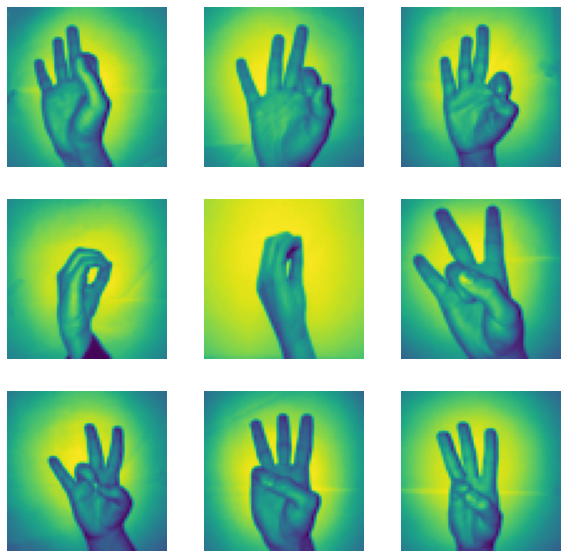

In [3]:
# Some samples
img_size = 64
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.axis('off')
    plt.imshow(x[i*100].reshape(img_size, img_size))

In [4]:
print(f"Shape of x : {x.shape}\nShape of y : {y.shape}")

Shape of x : (2062, 64, 64)
Shape of y : (2062, 10)


## Train-Test Split

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=11)

In [6]:
# Reshape
x_train = x_train.reshape(-1,64,64,1)
x_test = x_test.reshape(-1,64,64,1)

In [7]:
print(f"Shape of x_train : {x_train.shape}\nShape of x_test : {x_test.shape}\nShape of y_train : {y_train.shape}\nShape of y_test : {y_test.shape}\n")

Shape of x_train : (1649, 64, 64, 1)
Shape of x_test : (413, 64, 64, 1)
Shape of y_train : (1649, 10)
Shape of y_test : (413, 10)



## CNN Modeling

In [8]:
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, Activation
from keras.optimizers import Adam

In [9]:
input_shape = x_train.shape[1:]
input_shape

(64, 64, 1)

In [10]:
# CNN
model = Sequential()

model.add(Conv2D(filters = 8, kernel_size = (5,5), padding="Same", activation="relu", input_shape=input_shape))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 16, kernel_size = (3,3), padding="Same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(filters = 24, kernel_size = (3,3), padding="Same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 8)         208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 24)        3480      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 24)          0

In [12]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [13]:
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
52/52 [==============================] - 5s 75ms/step - loss: 2.3583 - accuracy: 0.1054 - val_loss: 2.2943 - val_accuracy: 0.0969
Epoch 2/50
52/52 [==============================] - 3s 61ms/step - loss: 2.2443 - accuracy: 0.1913 - val_loss: 1.6443 - val_accuracy: 0.4673
Epoch 3/50
52/52 [==============================] - 4s 68ms/step - loss: 1.3548 - accuracy: 0.5357 - val_loss: 0.8760 - val_accuracy: 0.7046
Epoch 4/50
52/52 [==============================] - 3s 63ms/step - loss: 0.8101 - accuracy: 0.7318 - val_loss: 0.6966 - val_accuracy: 0.7869
Epoch 5/50
52/52 [==============================] - 3s 62ms/step - loss: 0.6248 - accuracy: 0.7829 - val_loss: 0.5878 - val_accuracy: 0.8160
Epoch 6/50
52/52 [==============================] - 3s 63ms/step - loss: 0.5141 - accuracy: 0.8306 - val_loss: 0.4489 - val_accuracy: 0.8596
Epoch 7/50
52/52 [==============================] - 3s 62ms/step - loss: 0.4089 - accuracy: 0.8480 - val_loss: 0.4507 - val_accuracy: 0.8402
Epoch 8/50
52

## Evaluate

In [14]:
final_loss, final_accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Final validation loss: {0:.4f}, final validation accuracy: {1:.4f}".format(final_loss, final_accuracy))

Final validation loss: 0.2253, final validation accuracy: 0.9516


In [15]:
final_loss, final_accuracy = model.evaluate(x_train, y_train, verbose=0)
print("Final train loss: {0:.4f}, final train accuracy: {1:.4f}".format(final_loss, final_accuracy))

Final train loss: 0.0037, final train accuracy: 0.9994


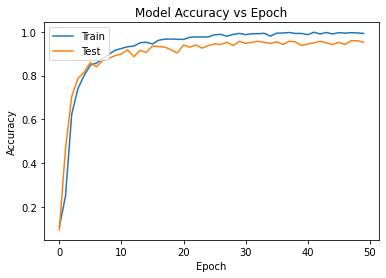

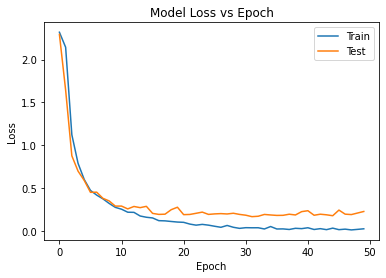

In [16]:
# Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss vs Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

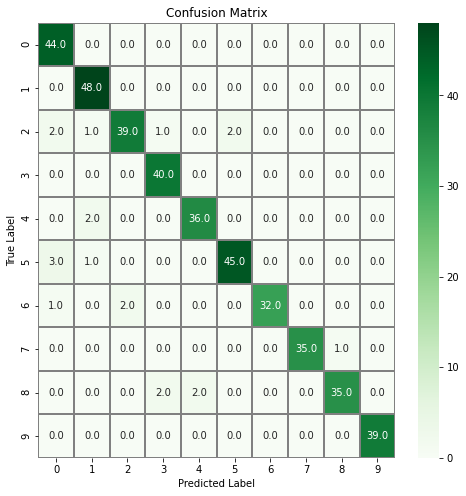

In [17]:
# Prediction from validation 
Y_pred = model.predict(x_test)
Y_pred_class = np.argmax(Y_pred, axis=1) # prediction classes to one hot vectors
Y_true = np.argmax(y_test, axis=1)

confusion_matrix = confusion_matrix(Y_true, Y_pred_class)
f, ax = plt.subplots(figsize=(8,8))
sns.heatmap(confusion_matrix, annot=True, linewidths=0.01, cmap="Greens", linecolor="gray", fmt=".1f", ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [18]:
for i in range(len(confusion_matrix)):
    print("Class : ",str(i))
    print("Number of Wrong Predictions : ", str(sum(confusion_matrix[i])-confusion_matrix[i][i]), "out of "+str(sum(confusion_matrix[i])))
    print("Percentage of True Predictions : {:.2f}%".format(confusion_matrix[i][i] / (sum(confusion_matrix[i])/100) ))
    print("***********************************************************")

Class :  0
Number of Wrong Predictions :  0 out of 44
Percentage of True Predictions : 100.00%
***********************************************************
Class :  1
Number of Wrong Predictions :  0 out of 48
Percentage of True Predictions : 100.00%
***********************************************************
Class :  2
Number of Wrong Predictions :  6 out of 45
Percentage of True Predictions : 86.67%
***********************************************************
Class :  3
Number of Wrong Predictions :  0 out of 40
Percentage of True Predictions : 100.00%
***********************************************************
Class :  4
Number of Wrong Predictions :  2 out of 38
Percentage of True Predictions : 94.74%
***********************************************************
Class :  5
Number of Wrong Predictions :  4 out of 49
Percentage of True Predictions : 91.84%
***********************************************************
Class :  6
Number of Wrong Predictions :  3 out of 35
Percentage of True 

In [19]:
values = {'pred': model.predict_classes(x_test), 'true': np.argmax(y_test,axis=1)} 
df = pd.DataFrame(data=values)

# Looking at wrong predicted values
array1 = np.array(df[(df.pred != df.true) & (df.true==1)].index)
print(array1)

# Total mistakes
df2 = df[(df.pred != df.true)]
df2

[]


,pred,true
38,1,4
39,4,8
40,2,6
66,1,4
75,0,5
103,3,8
111,5,2
127,0,5
132,0,6
173,5,2


ValueError: num must be 1 <= num <= 18, not 19

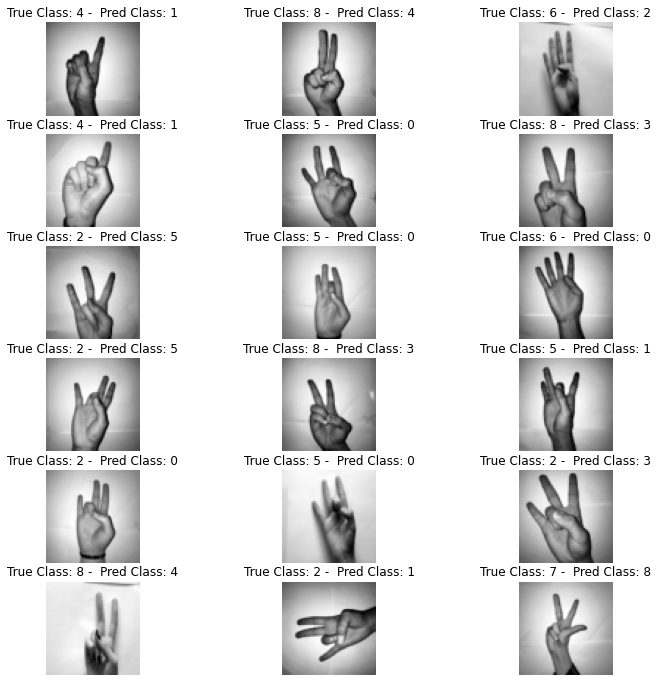

In [20]:
plt.figure(figsize = (12,12))

for i in range(len(df2)):
    plt.subplot(6, 3, i+1)
    img = x_test[df2.index[i]]
    img = img.reshape((64,64))
    plt.imshow(img, cmap='gray')
    plt.title("True Class: " + str(df2["true"].iloc[i])+" -  Pred Class: " + str(df2["pred"].iloc[i]))
    plt.axis('off')
    
plt.show()